# **Import Dependncies**

In [107]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


import os
import random

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import cv2

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG19
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# **Define Data Path**

In [108]:
data_path = '/kaggle/input/brain-tumor-mri-images-44c/'

# **EDA**

In [109]:
def main(train_data_path):
    
    """
    return training and testing dataframes including 2 columns image path and its label
    
    Args:
      train_data_path (string): string includes your train data path
      test_data_path (string): string includes your test data path
      note: data_path argument must contains your classes dirs
      
    Returns:
      train_df (dataframe):  It consists of two columns (the path of the image and its label) and contains records of the path of the training images and the label of each image
      test_df (dataframe):  It consists of two columns (the path of the image and its label) and contains records of the path of the testing images and the label of each image

    """
    
    for dirs in [train_data_path]:

        filepaths = []
        labels = []
        classes_list = sorted(os.listdir(dirs))

        filepaths,labels = get_fileList(classes_list, dirs, filepaths, labels)
        
        train_df = obtain_train_df(filepaths, labels)
        
            
    return train_df



def get_fileList(classes_list, dirs, filepaths, labels):
    
    
    """
    return file paths list including all full image paths and label for each one
    
    Args:
      classes_list (list): list includes name of classes dirs
      dirs (string): the data path
      filepaths (list): empty list to fill with images paths later
      labels (list): empty list to fill with each image label later
      
    Returns:
      count (scalar):  number of images in your dataset
    """
    
    
    for s_class in classes_list:
        
        label = s_class
        classpath = os.path.join(dirs, s_class)
        flist = sorted(os.listdir(classpath))
        
        store_image_names_and_its_labels(flist, classpath, filepaths, labels, label)
        
    return filepaths, labels


def store_image_names_and_its_labels(flist, classpath, filepaths, labels, label):
    
    """
    return nothing, it fills the filepaths list with all the images paths and its labels
    
    Args:
      flist (list) : contains all the image names in certain class
      classes_list (list): list includes name of classes dirs
      filepaths (list): stores all the images paths
      labels (list): stores the label of each image in the dataset
      label (string): label for a specific image
      
    Returns:
      nothing
    """
    
    
    for file in flist:
        file_path = os.path.join(classpath, file)
        filepaths.append(file_path)
        labels.append(label)



def obtain_train_df(filepaths, labels):
    
    """
    Return Dataframe with 2 columns contains each image path with its label
    
    Args:
      filepaths (list): stores all the images paths
      labels (list): stores the label of each image in the dataset
      
    Returns:
      train_df (DataFrame):  Dataframe with 2 columns contains each image path with its label
    """
    
    train_df =pd.DataFrame({
        'image_path' : filepaths,
        'label' : labels
    })
    return train_df

In [110]:
data_df = main(data_path)

In [111]:
data_df.head()

,image_path,label
0,/kaggle/input/brain-tumor-mri-images-44c/Astro...,Astrocitoma T1
1,/kaggle/input/brain-tumor-mri-images-44c/Astro...,Astrocitoma T1
2,/kaggle/input/brain-tumor-mri-images-44c/Astro...,Astrocitoma T1
3,/kaggle/input/brain-tumor-mri-images-44c/Astro...,Astrocitoma T1
4,/kaggle/input/brain-tumor-mri-images-44c/Astro...,Astrocitoma T1


In [112]:
num_classes = len(data_df['label'].unique())
print(f"We have {num_classes} classes")
print(f"We have {data_df.shape[0]} images")

We have 44 classes
We have 4479 images


In [113]:
data_df['label'].value_counts()

label
Meningioma T1C+           369
Meningioma T1             272
_NORMAL T2                271
_NORMAL T1                251
Astrocitoma T1C+          233
Meningioma T2             233
Neurocitoma T1C+          223
Schwannoma T1C+           194
Astrocitoma T1            176
Astrocitoma T2            171
Schwannoma T1             148
Neurocitoma T1            130
Schwannoma T2             123
Carcinoma T1C+            112
Papiloma T1C+             108
Neurocitoma T2            104
Glioblastoma T1C+          94
Oligodendroglioma T1       86
Tuberculoma T1C+           84
Carcinoma T2               73
Oligodendroglioma T1C+     72
Meduloblastoma T1C+        67
Papiloma T1                66
Oligodendroglioma T2       66
Carcinoma T1               66
Papiloma T2                63
Ependimoma T2              57
Glioblastoma T2            55
Glioblastoma T1            55
Ependimoma T1C+            48
Ependimoma T1              45
Meduloblastoma T2          41
Germinoma T1C+             40
Tube

In [114]:
def count_plot(x, title, xlabel, ylabel, width, length, order = None, rotation=False, palette='winter'):
    plt.figure(figsize=(width,length))
    sns.countplot(x = x, palette=palette, order = order)
    plt.title(title, fontsize=25)
    if rotation:
        plt.xticks(rotation = 'vertical')
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.show()

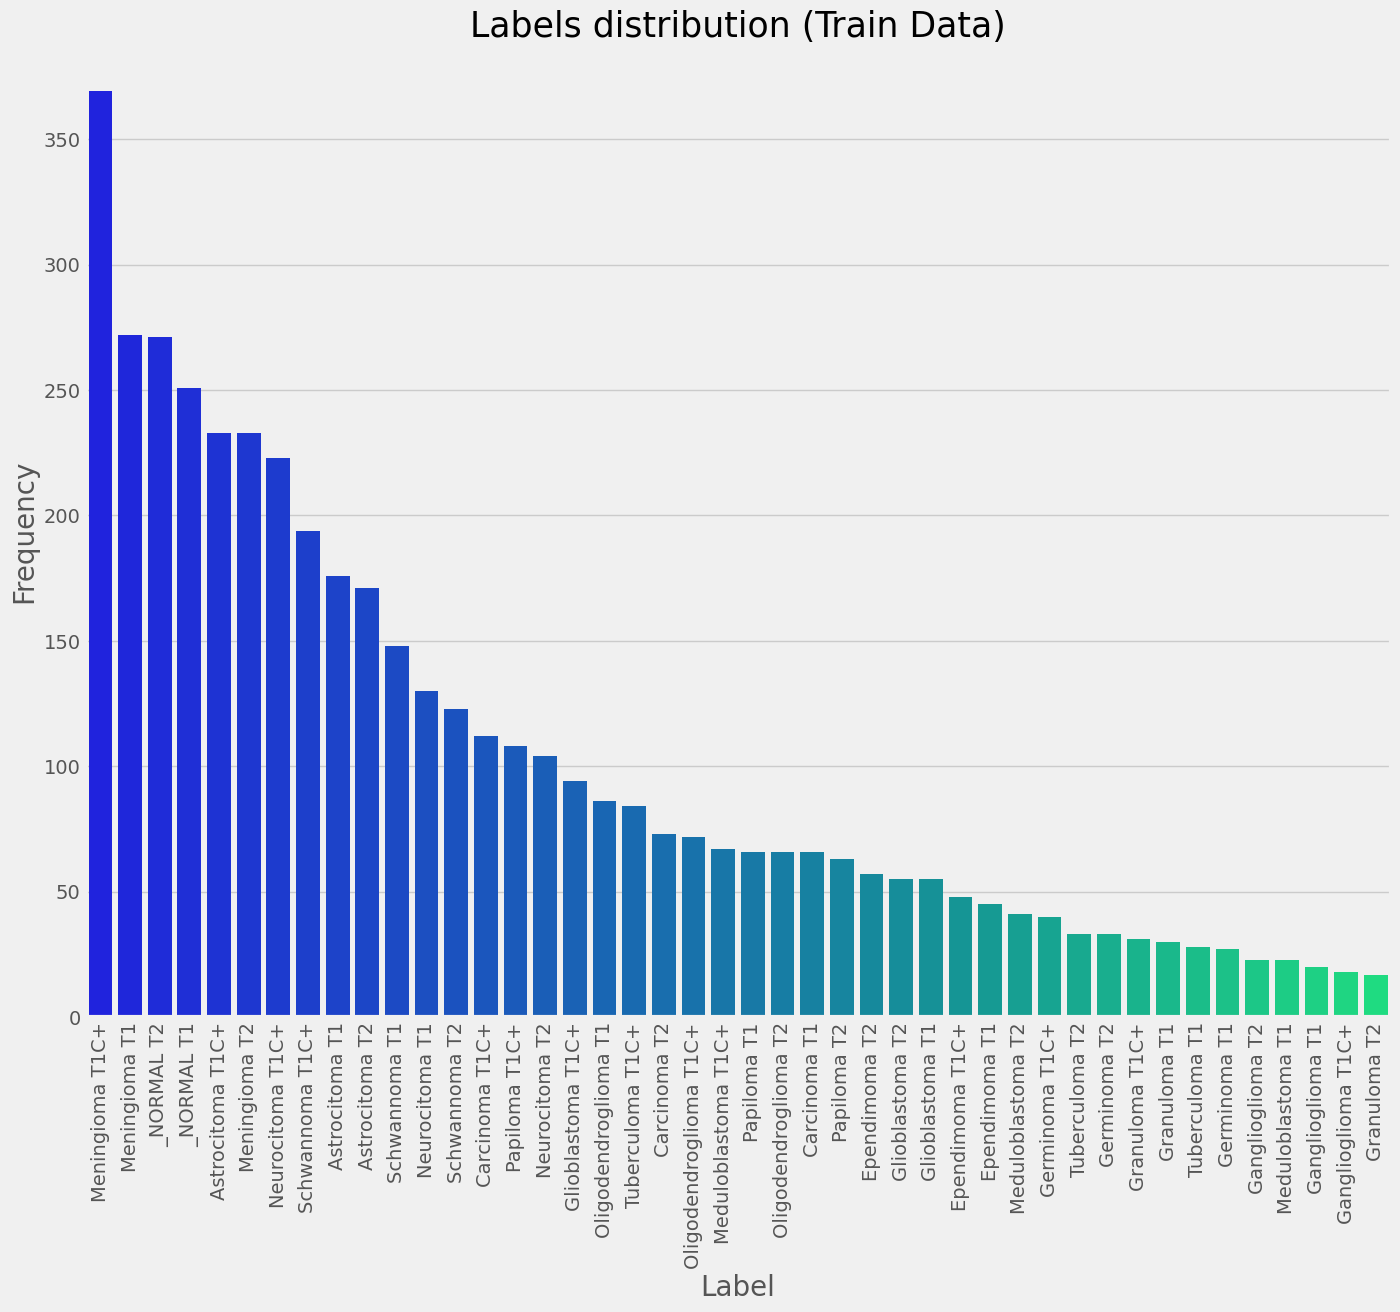

In [115]:
x = data_df['label']
order = x.value_counts().index
count_plot(x, "Labels distribution (Train Data)", "Label", 'Frequency', 15,12, rotation = True, order=order)

### **Data is imbalanced as hell**

In [116]:
test_split_size = 0.3
train_df, test_df = train_test_split(data_df, test_size=test_split_size, shuffle=True, random_state=123, stratify=data_df['label'])
test_df, valid_df = train_test_split(test_df, test_size=0.5, shuffle=True, random_state=123, stratify=test_df['label'])

In [117]:
train_df.head()

,image_path,label
2175,/kaggle/input/brain-tumor-mri-images-44c/Menin...,Meningioma T1C+
1735,/kaggle/input/brain-tumor-mri-images-44c/Menin...,Meningioma T1
1191,/kaggle/input/brain-tumor-mri-images-44c/Gliob...,Glioblastoma T1
129,/kaggle/input/brain-tumor-mri-images-44c/Astro...,Astrocitoma T1
1645,/kaggle/input/brain-tumor-mri-images-44c/Menin...,Meningioma T1


In [118]:
test_df.head()

,image_path,label
3506,/kaggle/input/brain-tumor-mri-images-44c/Schwa...,Schwannoma T1C+
1822,/kaggle/input/brain-tumor-mri-images-44c/Menin...,Meningioma T1
3265,/kaggle/input/brain-tumor-mri-images-44c/Papil...,Papiloma T1C+
4371,/kaggle/input/brain-tumor-mri-images-44c/_NORM...,_NORMAL T2
244,/kaggle/input/brain-tumor-mri-images-44c/Astro...,Astrocitoma T1C+


In [119]:
valid_df.head()

,image_path,label
3652,/kaggle/input/brain-tumor-mri-images-44c/Schwa...,Schwannoma T1C+
300,/kaggle/input/brain-tumor-mri-images-44c/Astro...,Astrocitoma T1C+
481,/kaggle/input/brain-tumor-mri-images-44c/Astro...,Astrocitoma T2
4051,/kaggle/input/brain-tumor-mri-images-44c/_NORM...,_NORMAL T1
892,/kaggle/input/brain-tumor-mri-images-44c/Epend...,Ependimoma T1C+


In [120]:
print(f"We have {len(train_df)} images in the training dataset\nWe have {len(valid_df)} images in the validating dataset\nWe have {len(test_df)} images in the testing dataset")

We have 3135 images in the training dataset
We have 672 images in the validating dataset
We have 672 images in the testing dataset


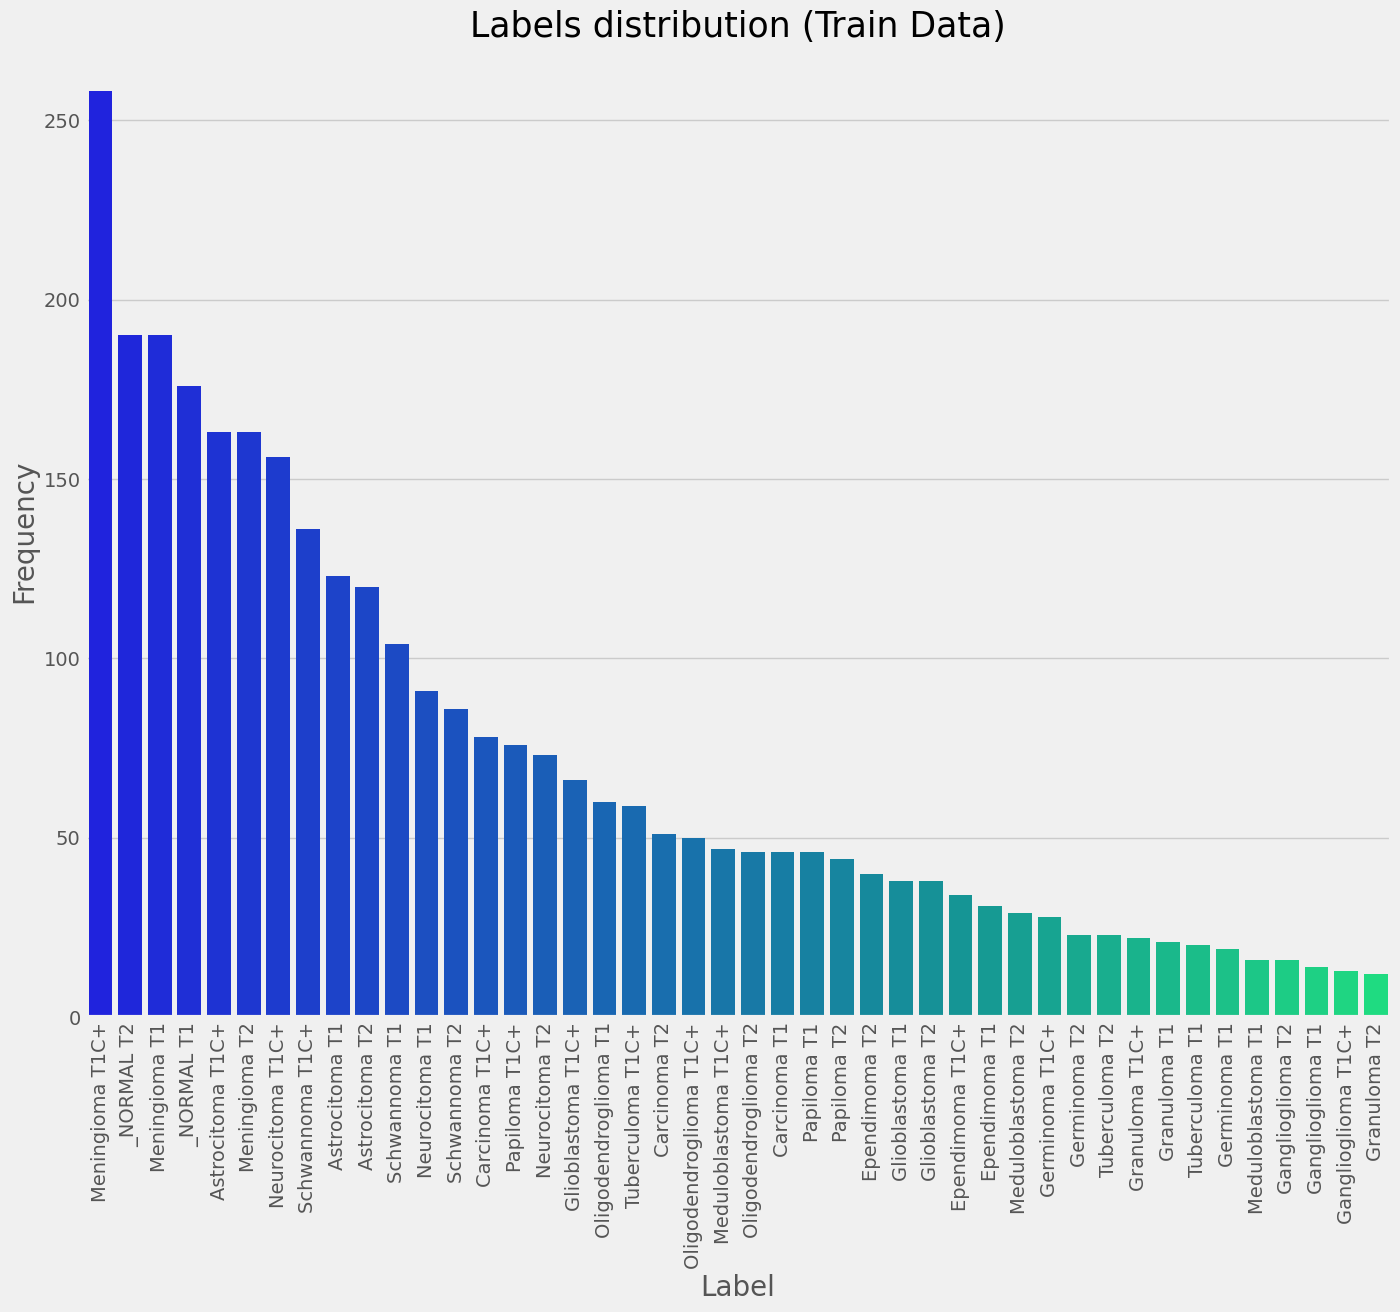

In [121]:
x = train_df['label']
order = x.value_counts().index
count_plot(x, "Labels distribution (Train Data)", "Label", 'Frequency', 15,12, rotation = True, order=order)

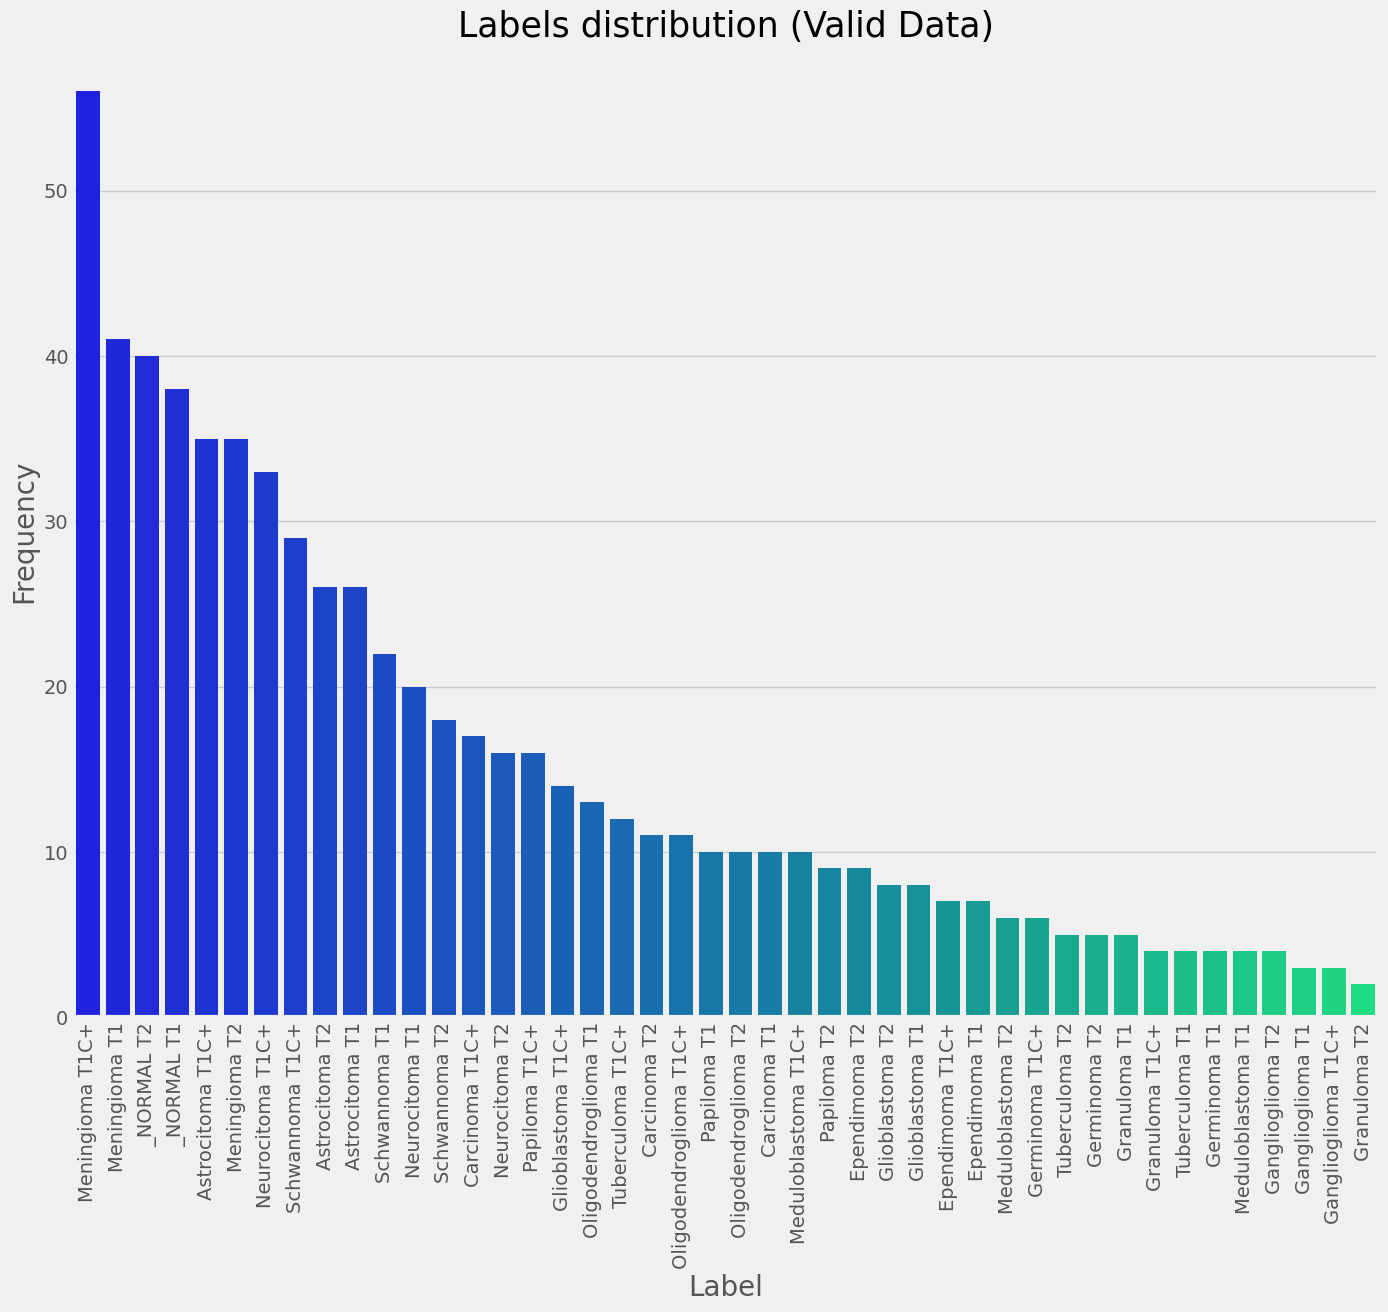

In [122]:
x = valid_df['label']
order = x.value_counts().index
count_plot(x, "Labels distribution (Valid Data)", "Label", 'Frequency', 15,12, rotation = True, order=order)

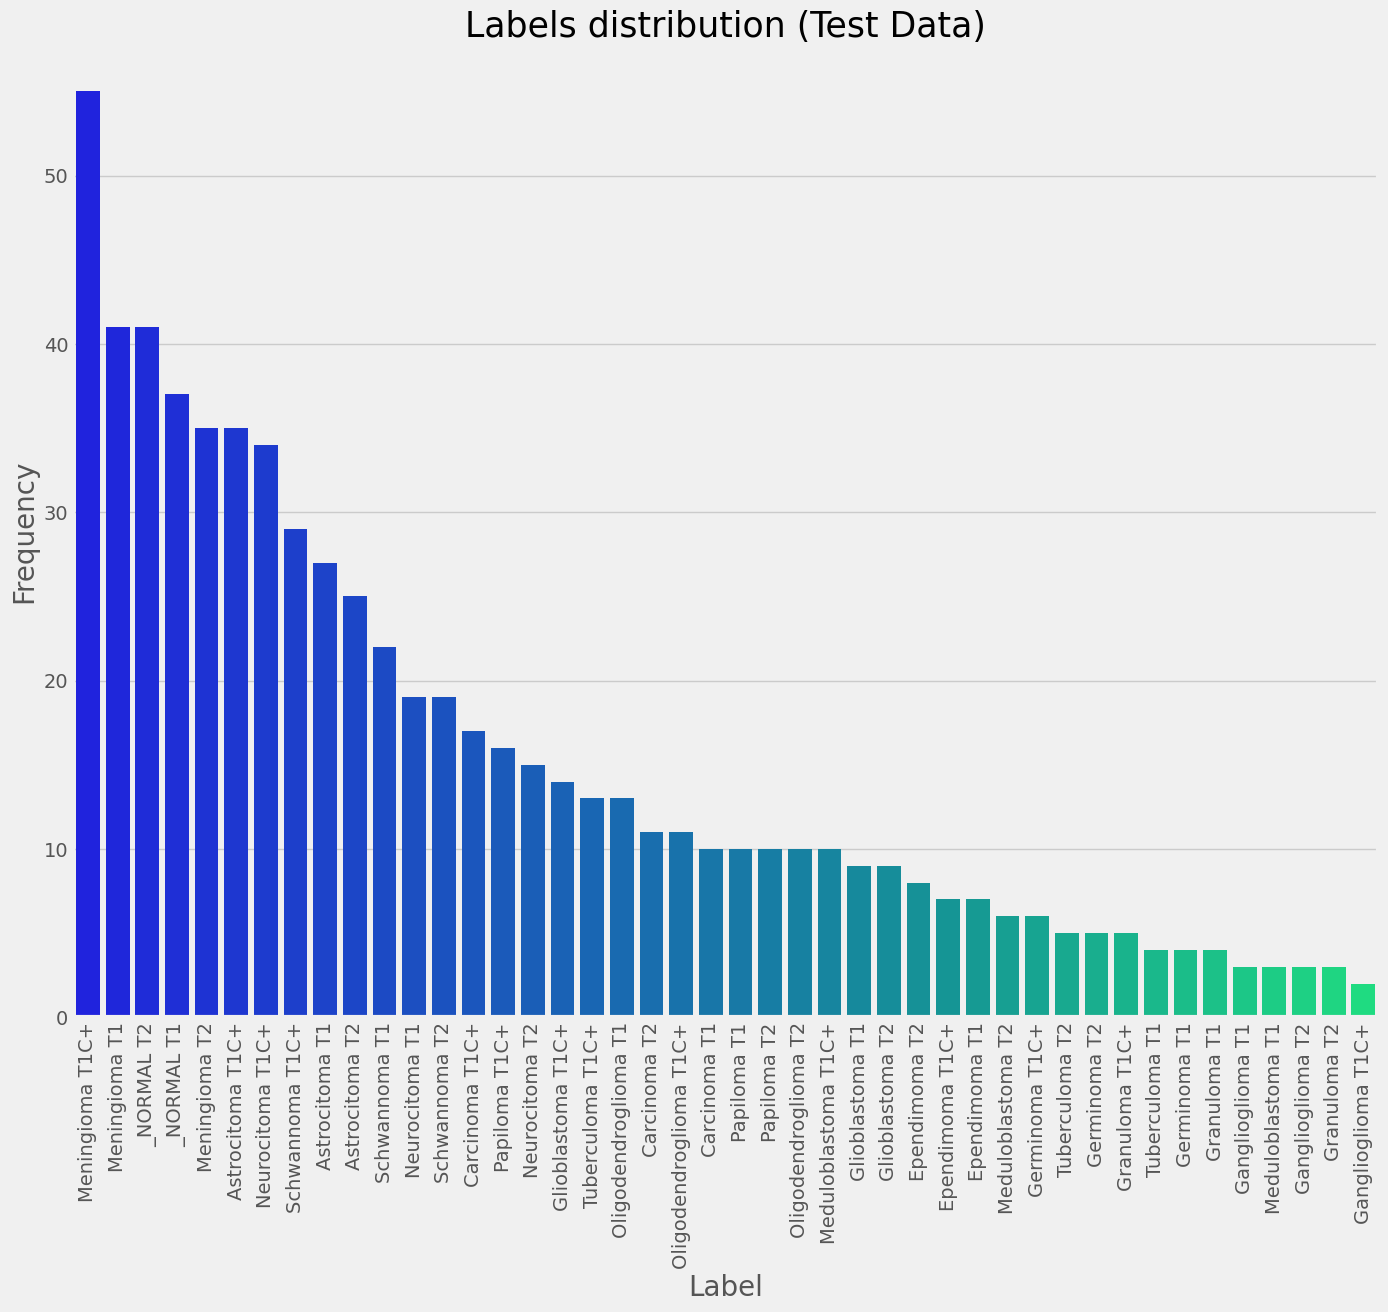

In [123]:
x = test_df['label']
order = x.value_counts().index
count_plot(x, "Labels distribution (Test Data)", "Label", 'Frequency', 15,12, rotation = True, order=order)

In [124]:
def get_images_avg_width_height(df):
    
    avg_width, avg_height = 0,0
    for i in df.index:
        
        try:
            img_path = df['image_path'].loc[i]
            img = cv2.imread(img_path)
            avg_width += img.shape[0]
            avg_height += img.shape[1]
        except:
            pass

    avg_width // len(df)
    avg_height // len(df)
    
    return avg_width, avg_height

In [125]:
len(data_df)

4479

In [126]:
data_avg_width, data_avg_height = get_images_avg_width_height(data_df)
print(f"Average width and height for the dataset is {data_avg_width//len(data_df)}x{data_avg_height//len(data_df)} with aspect_ratio {data_avg_width/data_avg_height}")

Average width and height for the dataset is 607x567 with aspect_ratio 1.0706256936627756


# **Initialize Generator Parameters**

In [127]:
img_size = (224, 224)
channels = 3
color = 'rgb'
img_shape = (img_size[0], img_size[1], channels)
batch_size = 32
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size
def scalar(img):
    return img

# **Define Generators for Training, Validating and Testing**

In [128]:
tr_gen = ImageDataGenerator(preprocessing_function= scalar, 
                            horizontal_flip= True)

ts_gen = ImageDataGenerator(preprocessing_function= scalar)

train_gen = tr_gen.flow_from_dataframe( train_df, 
                                       x_col= 'image_path', 
                                       y_col= 'label', 
                                       target_size= img_size, 
                                       class_mode= 'categorical',
                                       color_mode= color, 
                                       shuffle= True, 
                                       batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, 
                                       x_col= 'image_path', 
                                       y_col= 'label', 
                                       target_size= img_size, 
                                       class_mode= 'categorical',
                                       color_mode= color, 
                                       shuffle= True, 
                                       batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, 
                                      x_col= 'image_path', 
                                      y_col= 'label', 
                                      target_size= img_size, 
                                      class_mode= 'categorical',
                                      color_mode= color, 
                                      shuffle= False, 
                                      batch_size= test_batch_size)


Found 3134 validated image filenames belonging to 44 classes.
Found 672 validated image filenames belonging to 44 classes.
Found 672 validated image filenames belonging to 44 classes.


/opt/conda/lib/python3.10/site-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [129]:
class_count = len(list(train_gen.class_indices.keys())) 

# **Load the Pretrained Model (EfficientNetB5)**

# **Add Layers to the base model the compile it**

In [130]:
base_model = tf.keras.applications.efficientnet.EfficientNetB5(include_top= False, 
                                                               weights= "imagenet", 
                                                               input_shape= img_shape,
                                                               pooling= 'max')

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, 
          kernel_regularizer= regularizers.l2(l= 0.016), 
          activity_regularizer= regularizers.l1(0.006),
          bias_regularizer= regularizers.l1(0.006), 
          activation= 'relu'),
    
    Dropout(rate= 0.45, 
            seed= 123),
    
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb5 (Functional)  (None, 2048)             28513527  
                                                                 
 batch_normalization_3 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 44)                11308     
                                                                 
Total params: 29,057,571
Trainable params: 28,880,732
Non-trainable params: 176,839
____________________________________

In [131]:
#info about optimizers
model.optimizer.get_config()  

{'name': 'Adamax',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': True,
 'is_legacy_optimizer': False,
 'learning_rate': 0.001,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

# **Train the model**

In [133]:
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=5,
                           verbose=1)

checkpoint = ModelCheckpoint('model_weights.h5', 
                             monitor='val_loss', 
                             save_best_only=True, 
                             save_weights_only=True, 
                             mode='min', 
                             verbose=1)


history = model.fit(x= train_gen,
                    steps_per_epoch = 20,
                    epochs= 100, 
                    callbacks=[early_stop, checkpoint],
                    validation_data= valid_gen)

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 4.4285 - accuracy: 0.9484
Epoch 1: val_loss improved from inf to 4.80066, saving model to model_weights.h5
20/20 [==============================] - 17s 856ms/step - loss: 4.4285 - accuracy: 0.9484 - val_loss: 4.8007 - val_accuracy: 0.7917
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 4.2406 - accuracy: 0.9531
Epoch 2: val_loss improved from 4.80066 to 4.53445, saving model to model_weights.h5
20/20 [==============================] - 17s 858ms/step - loss: 4.2406 - accuracy: 0.9531 - val_loss: 4.5344 - val_accuracy: 0.8170
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 4.0676 - accuracy: 0.9469
Epoch 3: val_loss improved from 4.53445 to 4.37285, saving model to model_weights.h5
20/20 [==============================] - 17s 861ms/step - loss: 4.0676 - accuracy: 0.9469 - val_loss: 4.3728 - val_accuracy: 0.8155
Epoch 4/100
20/20 [==============================] - ETA: 0s - loss:

# **Plot loss and acc curves**

In [134]:
def plot_training(hist):
    '''
    This function take training model and plot history of accuracy and losses with the best epoch in both of them.
    '''

    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()

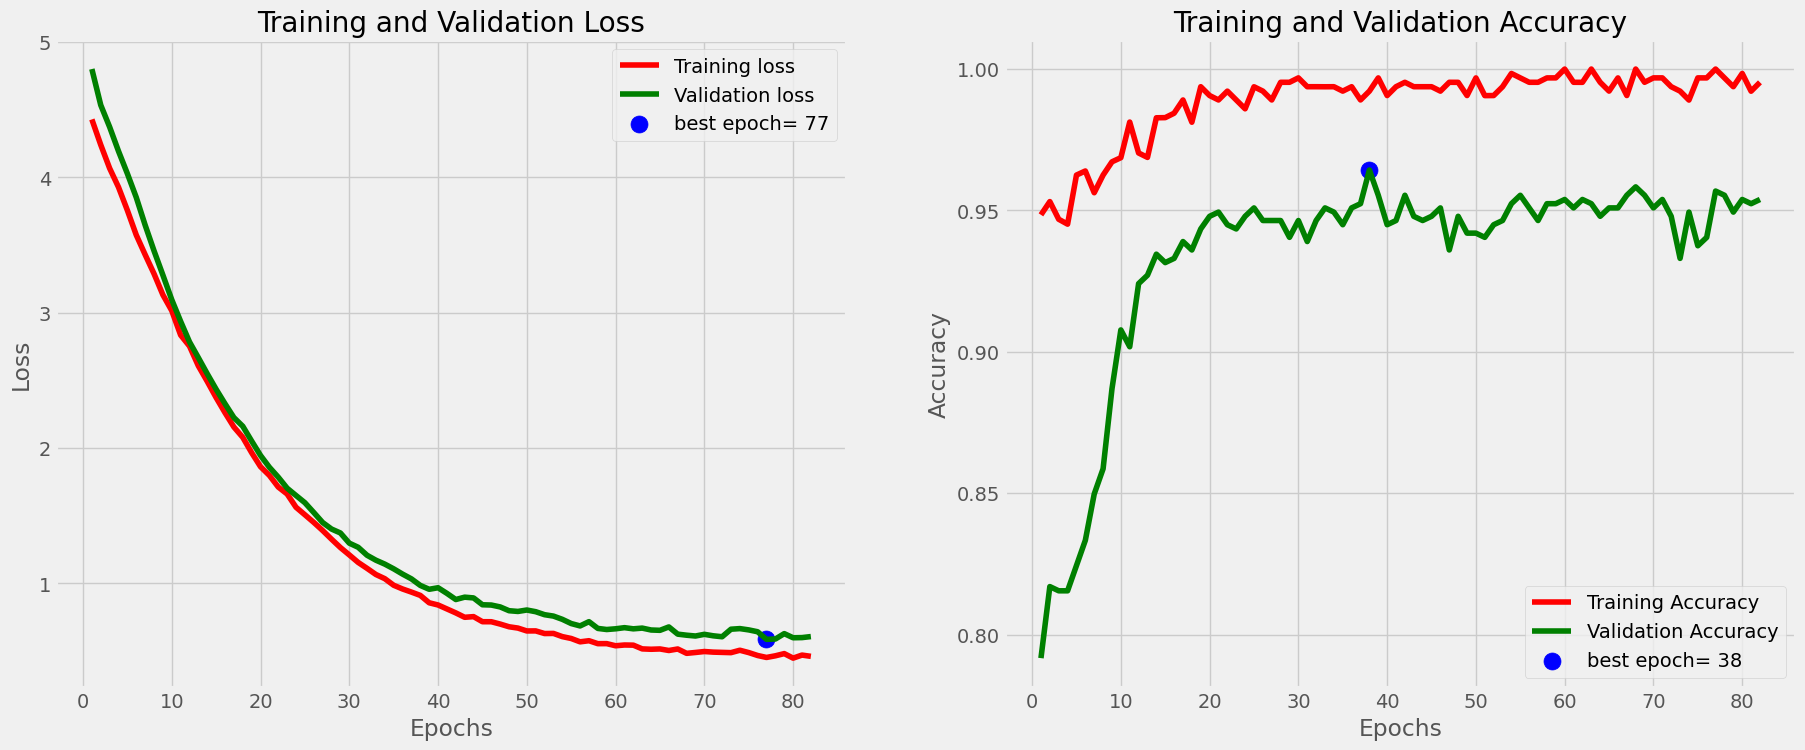

In [135]:
plot_training(history)

# **Evaluate the model**

In [136]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

12/12 [==============================] - 4s 249ms/step - loss: 0.6621 - accuracy: 0.9375
Train Loss:  0.39387038350105286
Train Accuracy:  1.0
--------------------
Validation Loss:  0.6602243185043335
Validation Accuracy:  0.9401041865348816
--------------------
Test Loss:  0.66213059425354
Test Accuracy:  0.9375


# **Plot Confussion Matrix**

In [137]:
y_pred = model.predict(test_gen)

y_pred_labels = np.argmax(y_pred, axis=1)

y_true_labels = test_gen.classes

12/12 [==============================] - 6s 256ms/step


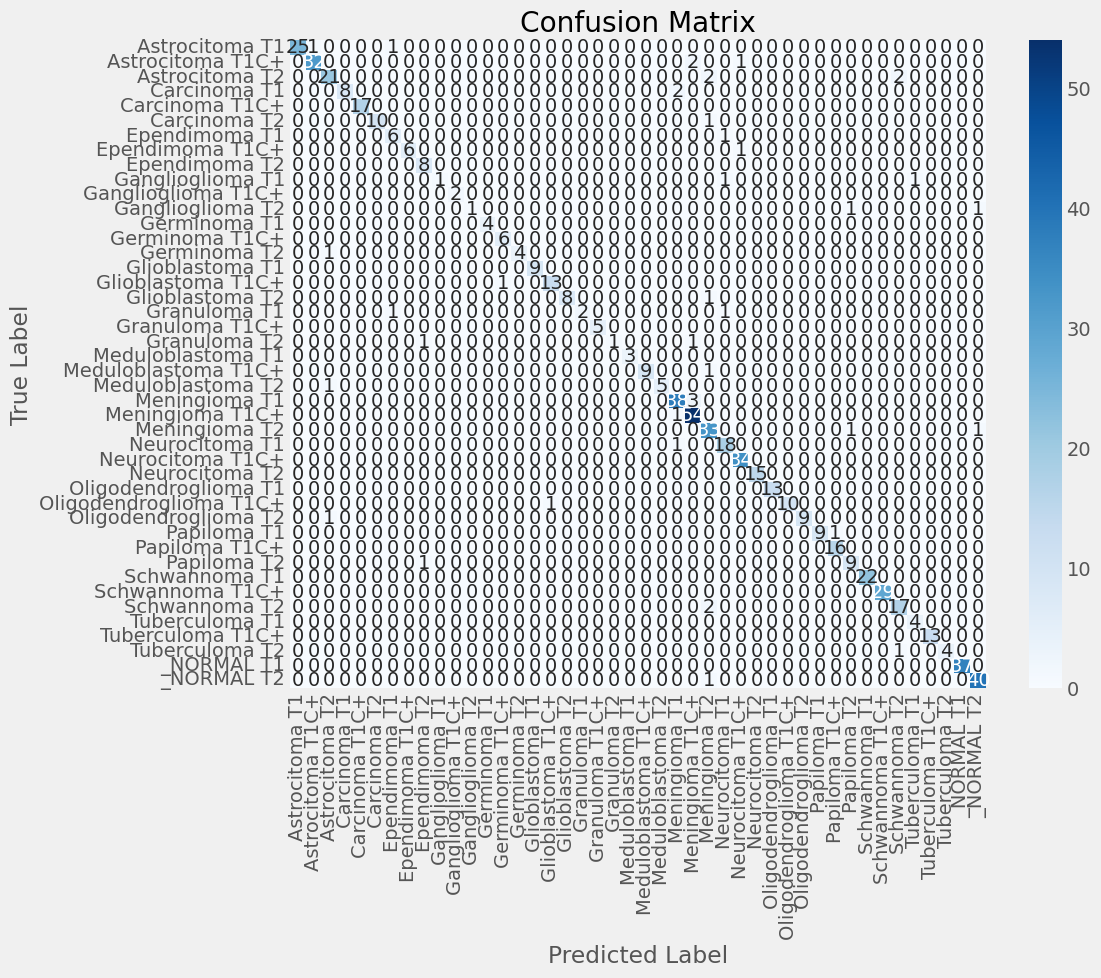

In [138]:
class_names = list(test_gen.class_indices.keys())

confusion_mtx = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, cmap="Blues", annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **Generate Classification Report**

In [139]:
report = classification_report(y_true_labels, y_pred_labels, target_names=class_names)

print("Classification Report: ")
print(report)

Classification Report: 
                        precision    recall  f1-score   support

        Astrocitoma T1       1.00      0.93      0.96        27
      Astrocitoma T1C+       0.97      0.91      0.94        35
        Astrocitoma T2       0.88      0.84      0.86        25
          Carcinoma T1       1.00      0.80      0.89        10
        Carcinoma T1C+       1.00      1.00      1.00        17
          Carcinoma T2       1.00      0.91      0.95        11
         Ependimoma T1       0.75      0.86      0.80         7
       Ependimoma T1C+       1.00      0.86      0.92         7
         Ependimoma T2       0.80      1.00      0.89         8
      Ganglioglioma T1       1.00      0.33      0.50         3
    Ganglioglioma T1C+       1.00      1.00      1.00         2
      Ganglioglioma T2       1.00      0.33      0.50         3
          Germinoma T1       1.00      1.00      1.00         4
        Germinoma T1C+       0.86      1.00      0.92         6
          Germi

# **VGG19**

In [140]:
tr_gen = ImageDataGenerator(preprocessing_function= scalar, 
                            horizontal_flip= True)

ts_gen = ImageDataGenerator(preprocessing_function= scalar)

train_gen = tr_gen.flow_from_dataframe( train_df, 
                                       x_col= 'image_path', 
                                       y_col= 'label', 
                                       target_size= img_size, 
                                       class_mode= 'categorical',
                                       color_mode= color, 
                                       shuffle= True, 
                                       batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, 
                                       x_col= 'image_path', 
                                       y_col= 'label', 
                                       target_size= img_size, 
                                       class_mode= 'categorical',
                                       color_mode= color, 
                                       shuffle= True, 
                                       batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, 
                                      x_col= 'image_path', 
                                      y_col= 'label', 
                                      target_size= img_size, 
                                      class_mode= 'categorical',
                                      color_mode= color, 
                                      shuffle= False, 
                                      batch_size= test_batch_size)


Found 3134 validated image filenames belonging to 44 classes.
Found 672 validated image filenames belonging to 44 classes.
Found 672 validated image filenames belonging to 44 classes.


/opt/conda/lib/python3.10/site-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [141]:
class_count = len(list(train_gen.class_indices.keys())) 

In [142]:
'''vgg19_base_model = tf.keras.applications.vgg19.VGG19(include_top= False, 
                                                               weights= "imagenet", 
                                                               input_shape= img_shape,
                                                               pooling= 'max')



vgg19_base_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

#vgg19_base_model.summary()'''


vgg19_model = VGG19(include_top=False, pooling='avg', weights='imagenet', input_shape = (img_shape))
for layer in vgg19_model.layers:
    layer.trainable = False
# Check if all layers except conv5 layers are not trainable
#for i, layer in enumerate(res_model.layers):
#    print(i, layer.name, "-", layer.trainable)

In [143]:
#info about optimizers
model.optimizer.get_config()  

{'name': 'Adamax',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': True,
 'is_legacy_optimizer': False,
 'learning_rate': 0.001,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

In [144]:
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=5,
                           verbose=1)

checkpoint = ModelCheckpoint('model_weights.h5', 
                             monitor='val_loss', 
                             save_best_only=True, 
                             save_weights_only=True, 
                             mode='min', 
                             verbose=1)


'''history_vgg19 = vgg19_base_model.fit(x= train_gen, 
                    epochs= 200, 
                    callbacks=[early_stop, checkpoint],
                    validation_data= valid_gen)'''

'history_vgg19 = vgg19_base_model.fit(x= train_gen, \n                    epochs= 200, \n                    callbacks=[early_stop, checkpoint],\n                    validation_data= valid_gen)'

In [145]:
history_vgg19 = model.fit(x= train_gen,
                    steps_per_epoch = 20,
                    epochs = 100,
                    verbose = 1,
                    validation_data = valid_gen,
                    callbacks = [early_stop, checkpoint])

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 0.4546 - accuracy: 0.9953
Epoch 1: val_loss improved from inf to 0.62348, saving model to model_weights.h5
20/20 [==============================] - 17s 858ms/step - loss: 0.4546 - accuracy: 0.9953 - val_loss: 0.6235 - val_accuracy: 0.9390
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.4525 - accuracy: 0.9969
Epoch 2: val_loss improved from 0.62348 to 0.60436, saving model to model_weights.h5
20/20 [==============================] - 17s 858ms/step - loss: 0.4525 - accuracy: 0.9969 - val_loss: 0.6044 - val_accuracy: 0.9509
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.4476 - accuracy: 0.9984
Epoch 3: val_loss improved from 0.60436 to 0.57789, saving model to model_weights.h5
20/20 [==============================] - 17s 860ms/step - loss: 0.4476 - accuracy: 0.9984 - val_loss: 0.5779 - val_accuracy: 0.9539
Epoch 4/100
20/20 [==============================] - ETA: 0s - loss:

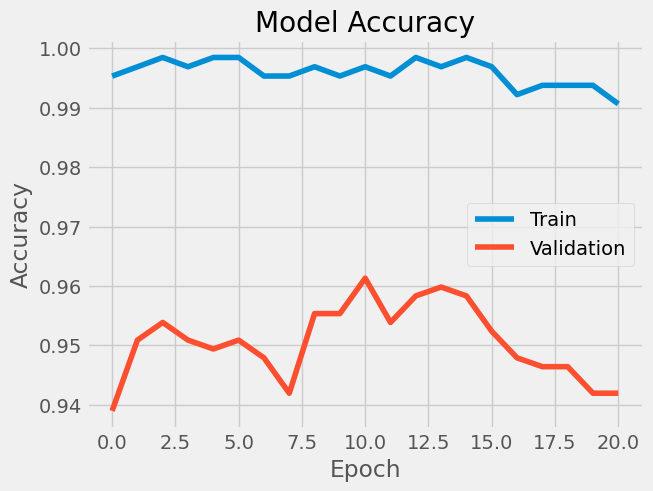

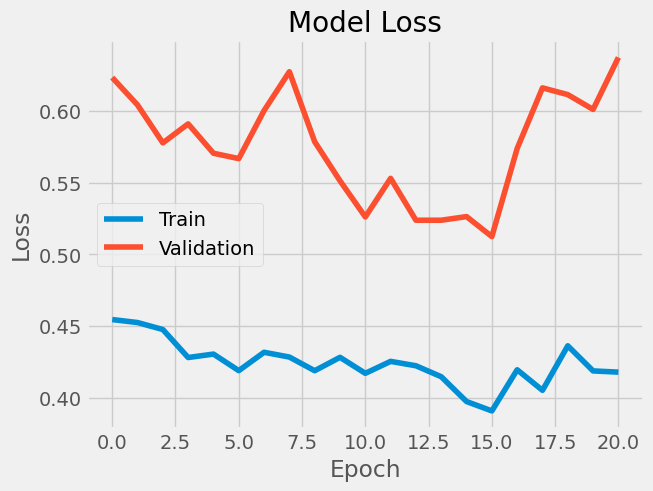

In [146]:

    
# visualize the model accuracy for the training data and Validation data
plt.plot(history_vgg19.history['accuracy'], label='Train')
plt.plot(history_vgg19.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# visualize the model loss for the training data and Validation data
plt.plot(history_vgg19.history['loss'], label='Train')
plt.plot(history_vgg19.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [147]:
result = model.evaluate(test_gen)

12/12 [==============================] - 3s 245ms/step - loss: 0.7322 - accuracy: 0.9226


In [148]:
y_pred = model.predict(test_gen)

y_pred_labels = np.argmax(y_pred, axis=1)

y_true_labels = test_gen.classes

12/12 [==============================] - 3s 273ms/step


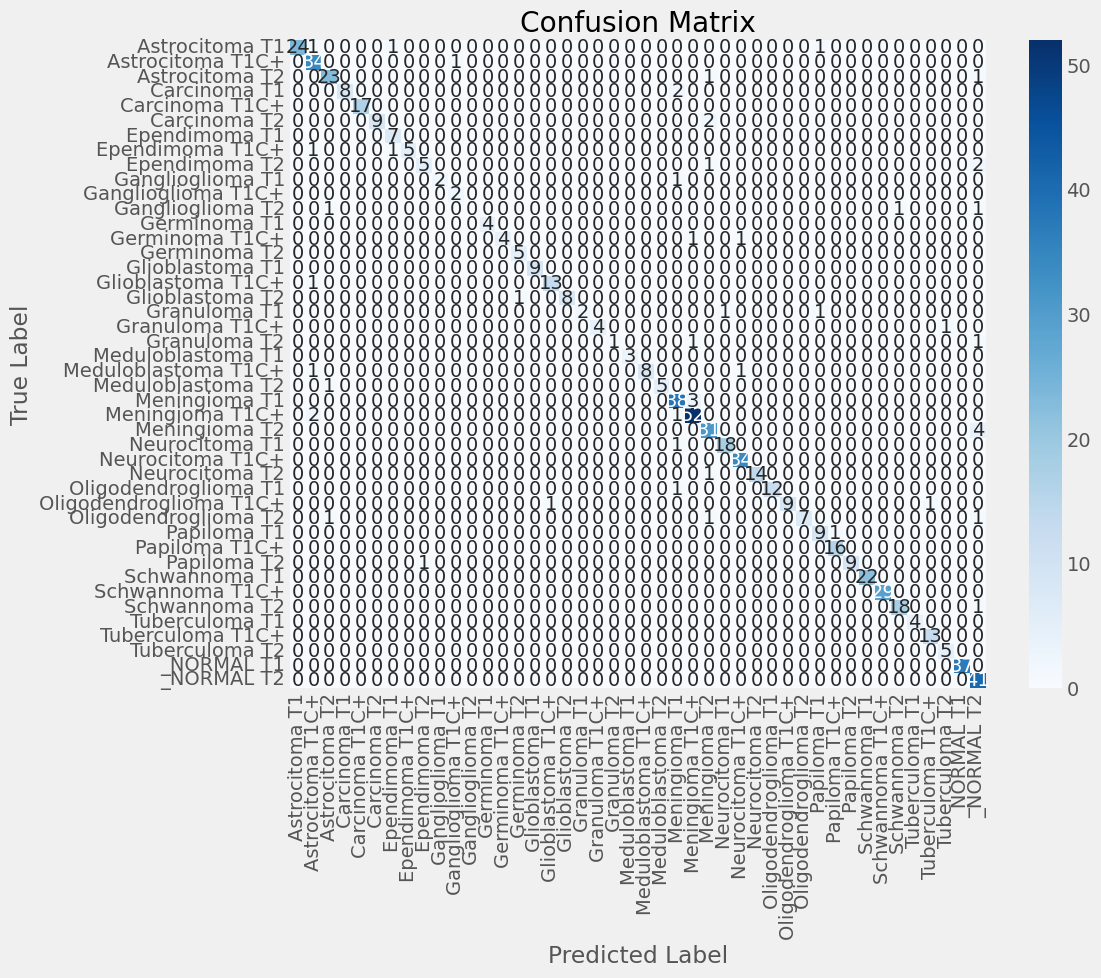

In [149]:
class_names = list(test_gen.class_indices.keys())

confusion_mtx = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, cmap="Blues", annot=True, fmt="d", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **VGG16**

In [150]:
from tensorflow.keras.applications import VGG16

In [151]:
tr_gen = ImageDataGenerator(preprocessing_function= scalar, 
                            horizontal_flip= True)

ts_gen = ImageDataGenerator(preprocessing_function= scalar)

train_gen = tr_gen.flow_from_dataframe( train_df, 
                                       x_col= 'image_path', 
                                       y_col= 'label', 
                                       target_size= img_size, 
                                       class_mode= 'categorical',
                                       color_mode= color, 
                                       shuffle= True, 
                                       batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, 
                                       x_col= 'image_path', 
                                       y_col= 'label', 
                                       target_size= img_size, 
                                       class_mode= 'categorical',
                                       color_mode= color, 
                                       shuffle= True, 
                                       batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, 
                                      x_col= 'image_path', 
                                      y_col= 'label', 
                                      target_size= img_size, 
                                      class_mode= 'categorical',
                                      color_mode= color, 
                                      shuffle= False, 
                                      batch_size= test_batch_size)


Found 3134 validated image filenames belonging to 44 classes.
Found 672 validated image filenames belonging to 44 classes.
Found 672 validated image filenames belonging to 44 classes.


/opt/conda/lib/python3.10/site-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [152]:
class_count = len(list(train_gen.class_indices.keys())) 

In [153]:
vgg_model = VGG16(include_top=False, pooling='avg', weights='imagenet', input_shape = (img_shape))
for layer in vgg_model.layers:
    layer.trainable = False
# Check if all layers except conv5 layers are not trainable
#for i, layer in enumerate(vgg_model.layers):
#    print(i, layer.name, "-", layer.trainable)

In [154]:
vgg_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [155]:
#info about optimizers
vgg_model.optimizer.get_config()  

{'name': 'Adamax',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': True,
 'is_legacy_optimizer': False,
 'learning_rate': 0.001,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

In [156]:
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=5,
                           verbose=1)

checkpoint = ModelCheckpoint('model_weights.h5', 
                             monitor='val_loss', 
                             save_best_only=True, 
                             save_weights_only=True, 
                             mode='min', 
                             verbose=1)

In [157]:
history_vgg16 = model.fit(x= train_gen,
                    steps_per_epoch = 20,
                    epochs = 100,
                    verbose = 1,
                    validation_data = valid_gen,
                    callbacks = [early_stop, checkpoint])

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 0.4145 - accuracy: 0.9953
Epoch 1: val_loss improved from inf to 0.63137, saving model to model_weights.h5
20/20 [==============================] - 17s 849ms/step - loss: 0.4145 - accuracy: 0.9953 - val_loss: 0.6314 - val_accuracy: 0.9449
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.3940 - accuracy: 0.9969
Epoch 2: val_loss improved from 0.63137 to 0.57008, saving model to model_weights.h5
20/20 [==============================] - 17s 832ms/step - loss: 0.3940 - accuracy: 0.9969 - val_loss: 0.5701 - val_accuracy: 0.9464
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.4011 - accuracy: 0.9937
Epoch 3: val_loss improved from 0.57008 to 0.56658, saving model to model_weights.h5
20/20 [==============================] - 17s 839ms/step - loss: 0.4011 - accuracy: 0.9937 - val_loss: 0.5666 - val_accuracy: 0.9479
Epoch 4/100
20/20 [==============================] - ETA: 0s - loss:

In [158]:
result = model.evaluate(test_gen)

12/12 [==============================] - 3s 247ms/step - loss: 0.6381 - accuracy: 0.9301


# **ResNet50**

In [159]:
from tensorflow.keras.applications import ResNet50

In [160]:
tr_gen = ImageDataGenerator(preprocessing_function= scalar, 
                            horizontal_flip= True)

ts_gen = ImageDataGenerator(preprocessing_function= scalar)

train_gen = tr_gen.flow_from_dataframe( train_df, 
                                       x_col= 'image_path', 
                                       y_col= 'label', 
                                       target_size= img_size, 
                                       class_mode= 'categorical',
                                       color_mode= color, 
                                       shuffle= True, 
                                       batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, 
                                       x_col= 'image_path', 
                                       y_col= 'label', 
                                       target_size= img_size, 
                                       class_mode= 'categorical',
                                       color_mode= color, 
                                       shuffle= True, 
                                       batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, 
                                      x_col= 'image_path', 
                                      y_col= 'label', 
                                      target_size= img_size, 
                                      class_mode= 'categorical',
                                      color_mode= color, 
                                      shuffle= False, 
                                      batch_size= test_batch_size)


Found 3134 validated image filenames belonging to 44 classes.


/opt/conda/lib/python3.10/site-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


Found 672 validated image filenames belonging to 44 classes.
Found 672 validated image filenames belonging to 44 classes.


In [161]:
class_count = len(list(train_gen.class_indices.keys())) 

In [163]:
res_model = ResNet50(include_top=False, pooling='avg', weights='imagenet', input_shape = (img_shape))
for layer in res_model.layers:
    if 'conv5' not in layer.name:
        layer.trainable = False

94765736/94765736 [==============================] - 4s 0us/step


In [164]:
res_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

res_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_14[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [165]:
#info about optimizers
res_model.optimizer.get_config()  

{'name': 'Adamax',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': True,
 'is_legacy_optimizer': False,
 'learning_rate': 0.001,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

In [166]:
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=5,
                           verbose=1)

checkpoint = ModelCheckpoint('model_weights.h5', 
                             monitor='val_loss', 
                             save_best_only=True, 
                             save_weights_only=True, 
                             mode='min', 
                             verbose=1)

In [167]:
res_model = model.fit(x= train_gen,
                    steps_per_epoch = 20,
                    epochs = 100,
                    verbose = 1,
                    validation_data = valid_gen,
                    callbacks = [early_stop, checkpoint])

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 0.3957 - accuracy: 0.9922
Epoch 1: val_loss improved from inf to 0.57316, saving model to model_weights.h5
20/20 [==============================] - 16s 826ms/step - loss: 0.3957 - accuracy: 0.9922 - val_loss: 0.5732 - val_accuracy: 0.9420
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.3807 - accuracy: 0.9937
Epoch 2: val_loss improved from 0.57316 to 0.54168, saving model to model_weights.h5
20/20 [==============================] - 16s 825ms/step - loss: 0.3807 - accuracy: 0.9937 - val_loss: 0.5417 - val_accuracy: 0.9524
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.3673 - accuracy: 0.9969
Epoch 3: val_loss improved from 0.54168 to 0.52106, saving model to model_weights.h5
20/20 [==============================] - 16s 822ms/step - loss: 0.3673 - accuracy: 0.9969 - val_loss: 0.5211 - val_accuracy: 0.9524
Epoch 4/100
20/20 [==============================] - ETA: 0s - loss:

In [168]:
result = model.evaluate(test_gen)

12/12 [==============================] - 3s 249ms/step - loss: 0.6339 - accuracy: 0.9315


# **ResNet101**

In [169]:
from tensorflow.keras.applications import ResNet101

In [170]:
tr_gen = ImageDataGenerator(preprocessing_function= scalar, 
                            horizontal_flip= True)

ts_gen = ImageDataGenerator(preprocessing_function= scalar)

train_gen = tr_gen.flow_from_dataframe( train_df, 
                                       x_col= 'image_path', 
                                       y_col= 'label', 
                                       target_size= img_size, 
                                       class_mode= 'categorical',
                                       color_mode= color, 
                                       shuffle= True, 
                                       batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, 
                                       x_col= 'image_path', 
                                       y_col= 'label', 
                                       target_size= img_size, 
                                       class_mode= 'categorical',
                                       color_mode= color, 
                                       shuffle= True, 
                                       batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, 
                                      x_col= 'image_path', 
                                      y_col= 'label', 
                                      target_size= img_size, 
                                      class_mode= 'categorical',
                                      color_mode= color, 
                                      shuffle= False, 
                                      batch_size= test_batch_size)


Found 3134 validated image filenames belonging to 44 classes.
Found 672 validated image filenames belonging to 44 classes.
Found 672 validated image filenames belonging to 44 classes.


/opt/conda/lib/python3.10/site-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [171]:
class_count = len(list(train_gen.class_indices.keys())) 

In [172]:
res101_model = ResNet101(include_top=False, pooling='avg', weights='imagenet', input_shape = (img_shape))
for layer in res101_model.layers:
    layer.trainable = False

171446536/171446536 [==============================] - 8s 0us/step


In [173]:
res101_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

res101_model.summary()

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_15[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

In [174]:
#info about optimizers
res101_model.optimizer.get_config()  

{'name': 'Adamax',
 'weight_decay': None,
 'clipnorm': None,
 'global_clipnorm': None,
 'clipvalue': None,
 'use_ema': False,
 'ema_momentum': 0.99,
 'ema_overwrite_frequency': None,
 'jit_compile': True,
 'is_legacy_optimizer': False,
 'learning_rate': 0.001,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

In [175]:
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=5,
                           verbose=1)

checkpoint = ModelCheckpoint('model_weights.h5', 
                             monitor='val_loss', 
                             save_best_only=True, 
                             save_weights_only=True, 
                             mode='min', 
                             verbose=1)

In [176]:
res101_model = model.fit(x= train_gen,
                    steps_per_epoch = 20,
                    epochs = 100,
                    verbose = 1,
                    validation_data = valid_gen,
                    callbacks = [early_stop, checkpoint])

Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 0.3517 - accuracy: 0.9937
Epoch 1: val_loss improved from inf to 0.51007, saving model to model_weights.h5
20/20 [==============================] - 17s 856ms/step - loss: 0.3517 - accuracy: 0.9937 - val_loss: 0.5101 - val_accuracy: 0.9583
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 0.3535 - accuracy: 0.9937
Epoch 2: val_loss did not improve from 0.51007
20/20 [==============================] - 16s 802ms/step - loss: 0.3535 - accuracy: 0.9937 - val_loss: 0.5665 - val_accuracy: 0.9479
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 0.3403 - accuracy: 1.0000
Epoch 3: val_loss did not improve from 0.51007
20/20 [==============================] - 16s 809ms/step - loss: 0.3403 - accuracy: 1.0000 - val_loss: 0.5337 - val_accuracy: 0.9479
Epoch 4/100
20/20 [==============================] - ETA: 0s - loss: 0.3547 - accuracy: 0.9969
Epoch 4: val_loss improved from 0.51007 to 0.4953

In [177]:
result = model.evaluate(test_gen)

12/12 [==============================] - 3s 250ms/step - loss: 0.5363 - accuracy: 0.9464
